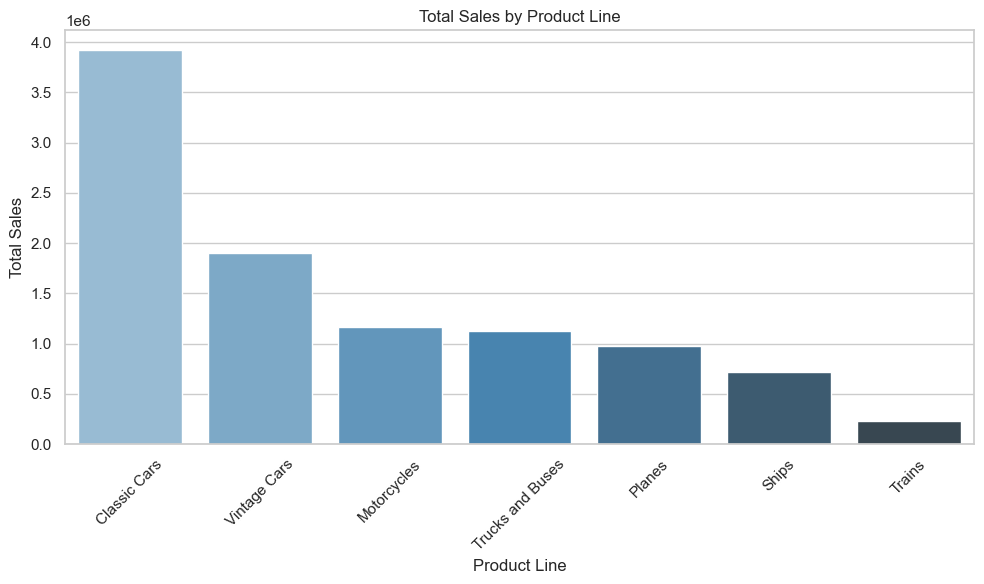

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

# Loading preprocessed dataset
df = pd.read_csv('../data/cleaned_sales_data.csv')
df_raw = pd.read_csv('../data/sales_data_sample.csv', encoding='latin1')

# df.head()
# df.info()
# df.describe()

product_sales = df_raw.groupby('PRODUCTLINE')['SALES'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=product_sales.index, y=product_sales.values, palette='Blues_d', hue=product_sales.index, legend=False)
plt.title("Total Sales by Product Line")
plt.xlabel("Product Line")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


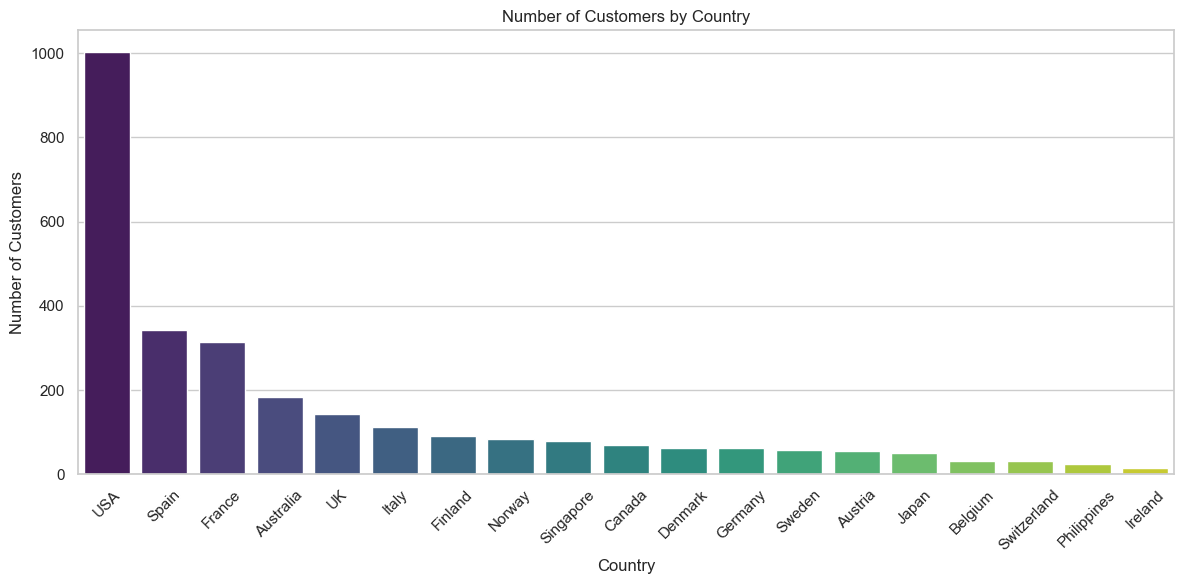

In [23]:
customer_count = df_raw['COUNTRY'].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(x=customer_count.index, y=customer_count.values, palette='viridis', hue=customer_count.index, legend=False)
plt.title("Number of Customers by Country")
plt.xlabel("Country")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


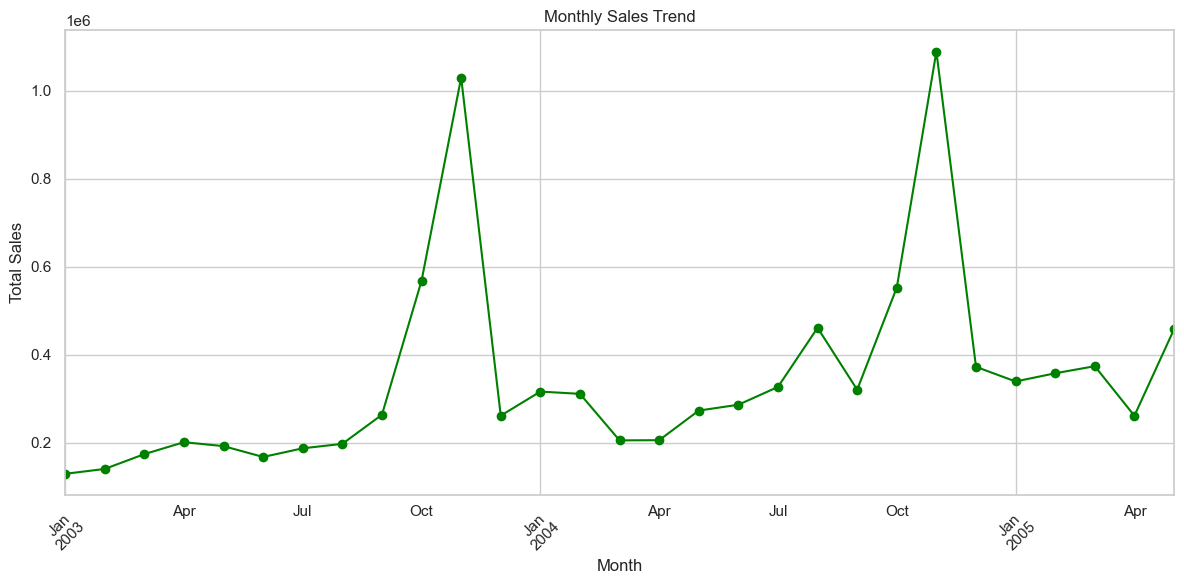

In [24]:
# Reload with date for time plot
df_date = pd.read_csv('../data/sales_data_sample.csv', encoding='latin1')
df_date['ORDERDATE'] = pd.to_datetime(df_date['ORDERDATE'], errors='coerce')
df_date.dropna(subset=['ORDERDATE'], inplace=True)

# Group by month
df_date['Month'] = df_date['ORDERDATE'].dt.to_period('M')
monthly_sales = df_date.groupby('Month')['SALES'].sum()

plt.figure(figsize=(12,6))
monthly_sales.plot(kind='line', marker='o', color='green')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


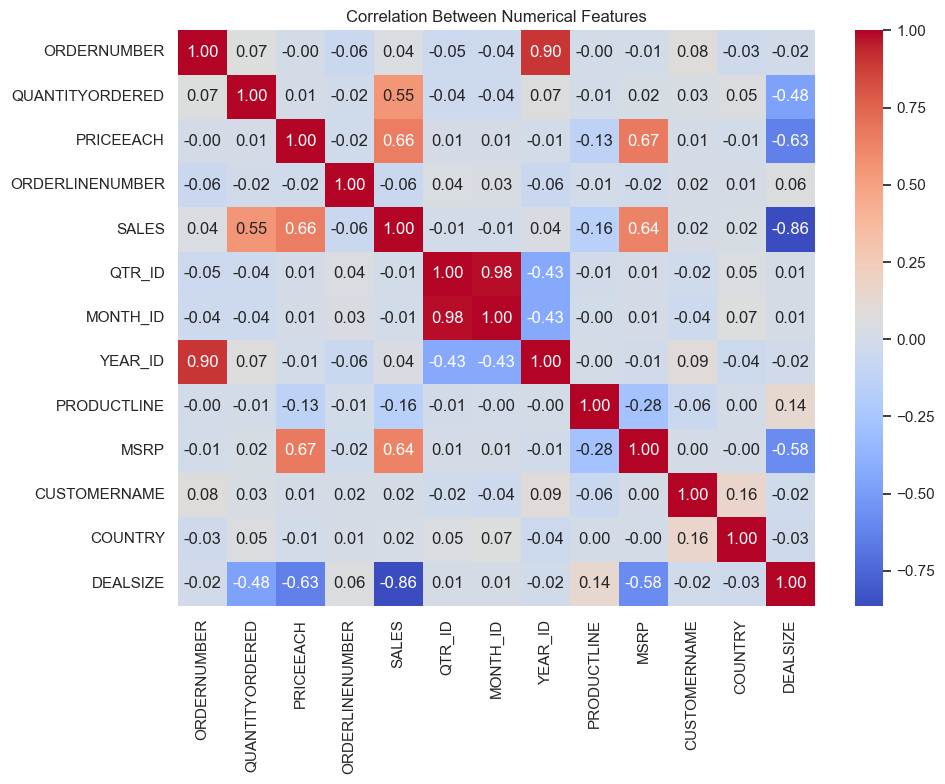

In [25]:
# Selecting only numeric columns for correlation
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Numerical Features")
plt.tight_layout()
plt.show()


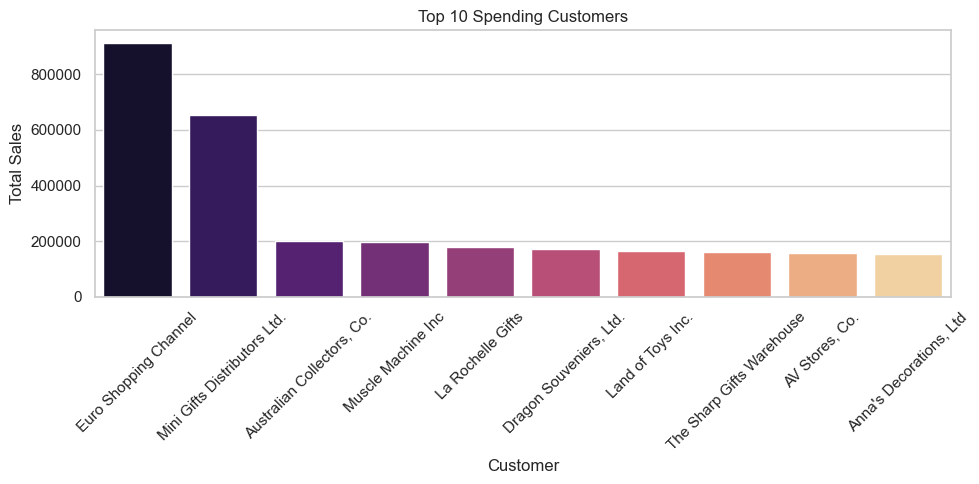

In [26]:
top_customers = df_raw.groupby('CUSTOMERNAME')['SALES'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_customers.index, y=top_customers.values, palette='magma', hue=top_customers.index, legend=False)
plt.title("Top 10 Spending Customers")
plt.xlabel("Customer")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
